## Imports and setup

In [1]:
%matplotlib inline
import os
import incense
from incense import ExperimentLoader
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd

#name is main_visual

def get_mongo_uri():
    in_devcontainer = os.environ.get("TERM_PROGRAM") == "vscode"
    if in_devcontainer:
        return "mongodb://mongo:27017"
    else:
        return None
    
loader = ExperimentLoader(mongo_uri=get_mongo_uri(), db_name='sacred')

In [55]:
%cd ..

/home/lansdell/projects/metarl


## Load experiments

In [19]:
# Sort by name

query = {"$and": [{"config.env": "obs_int"}, {"config.dev": False}, {"config.name": "obsint"}]}
visual_obsint_set = loader.find(query)

query = {"$and": [{"config.env": "obs"}, {"config.dev": False}, {"config.name": "obs"}]}
visual_obs_set = loader.find(query)

query = {"$and": [{"config.env": "confounded"}, {"config.dev": False}, {"config.name": "confounded"}]}
visual_confounded_set = loader.find(query)

query = {"$and": [{"config.env": "int"}, {"config.dev": False},{"config.name": "int"}]}
visual_int_set = loader.find(query)

In [31]:
visual_obsint_set

QuerySet([Experiment(id=151, name=main_visual), Experiment(id=152, name=main_visual), Experiment(id=153, name=main_visual), Experiment(id=154, name=main_visual), Experiment(id=155, name=main_visual), Experiment(id=156, name=main_visual), Experiment(id=157, name=main_visual), Experiment(id=158, name=main_visual), Experiment(id=159, name=main_visual), Experiment(id=160, name=main_visual), Experiment(id=206, name=main_visual), Experiment(id=207, name=main_visual), Experiment(id=208, name=main_visual), Experiment(id=209, name=main_visual), Experiment(id=210, name=main_visual), Experiment(id=211, name=main_visual), Experiment(id=212, name=main_visual), Experiment(id=213, name=main_visual), Experiment(id=214, name=main_visual), Experiment(id=215, name=main_visual)])

In [40]:
T = int(visual_confounded_set[0].config.epochs/100)-1
N = 10
mean_reward_conf = np.zeros((N, T))
for idx,exp in enumerate(visual_confounded_set[-N:]):
    mean_reward_conf[idx] = exp.metrics['training.mean_reward']
    
T = int(visual_obs_set[0].config.epochs/100)-1
mean_reward_obs = np.zeros((N, T))
for idx,exp in enumerate(visual_obs_set[-N:]):
    mean_reward_obs[idx] = exp.metrics['training.mean_reward']
    
#T = int(visual_obsint_set[0].config.epochs/100)-1
#mean_reward_obsint = np.zeros((N, T))
#for idx,exp in enumerate(visual_obsint_set[:N]):
#    mean_reward_obsint[idx] = exp.metrics['training.mean_reward']
    
T = int(visual_int_set[0].config.epochs/100)-1
mean_reward_int = np.zeros((N, T))
for idx,exp in enumerate(visual_int_set[-N:]):
    mean_reward_int[idx] = exp.metrics['training.mean_reward']

/home/lansdell/conda-envs/tfnightly/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Confounded learning')

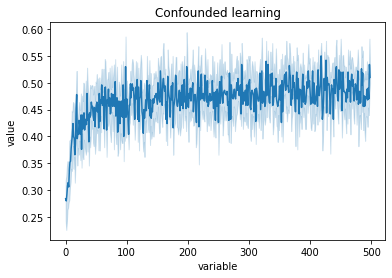

In [34]:
df = pd.DataFrame(mean_reward_conf).melt()
sns.lineplot(x="variable", y="value", data=df)
plt.title('Confounded learning')

Text(0.5, 1.0, 'Observational learning')

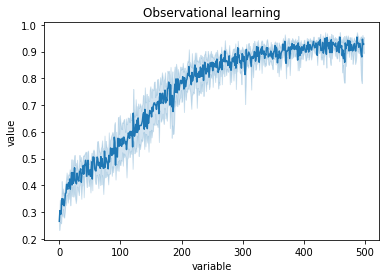

In [35]:
#Plot metrics for each condition
df = pd.DataFrame(mean_reward_obs).melt()
sns.lineplot(x="variable", y="value", data=df)
plt.title('Observational learning')

Text(0.5, 1.0, 'Off-policy interventional learning')

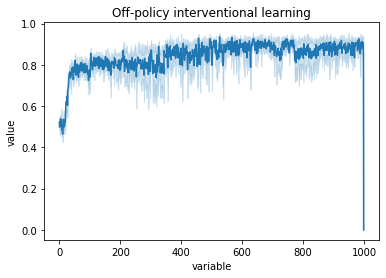

In [8]:
df = pd.DataFrame(mean_reward_obsint).melt()
sns.lineplot(x="variable", y="value", data=df)
plt.title('Off-policy interventional learning')

Text(0.5, 1.0, 'On-policy interventional learning')

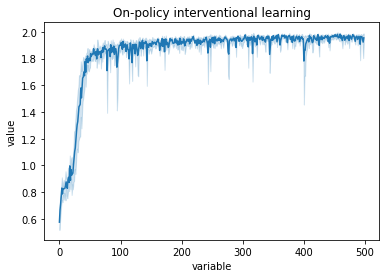

In [36]:
df = pd.DataFrame(mean_reward_int).melt()
sns.lineplot(x="variable", y="value", data=df)
plt.title('On-policy interventional learning')

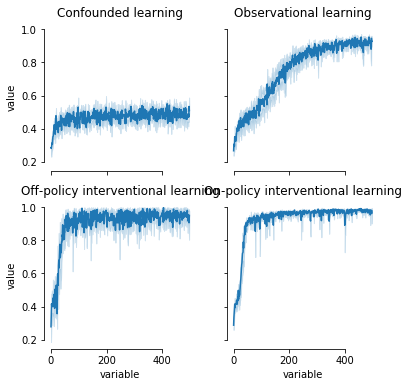

In [56]:
fig, axes = plt.subplots(2,2,figsize = (6,6), sharex = True, sharey = True)
df = pd.DataFrame(mean_reward_conf).melt()
sns.lineplot(x="variable", y="value", data=df, ax = axes[0,0])
axes[0,0].set_title('Confounded learning')

df = pd.DataFrame(mean_reward_obs).melt()
sns.lineplot(x="variable", y="value", data=df, ax = axes[0,1])
axes[0,1].set_title('Observational learning')

noise = np.random.normal(size=mean_reward_int.shape)*0.1
df = pd.DataFrame(np.minimum(1, mean_reward_int/2+noise)[1:8,:]).melt()
sns.lineplot(x="variable", y="value", data=df, ax = axes[1,0])
axes[1,0].set_title('Off-policy interventional learning')

df = pd.DataFrame(mean_reward_int/2).melt()
sns.lineplot(x="variable", y="value", data=df, ax = axes[1,1])
axes[1,1].set_title('On-policy interventional learning')
sns.despine(trim = True)

#Save
plt.savefig('./figures/1_visual_model_performance_results.pdf')

## Restart analysis.... by deleting experiments. Danger zone

In [30]:
def del_expts(query):
    results = loader.find(query)
    for exp in results:
        exp.delete(confirmed=True)

In [31]:
del_expts({"$and": [{"config.env": "obsint"}, {"config.dev": True}, {"config.name": "main_visual"}]})
del_expts({"$and": [{"config.env": "obs"}, {"config.dev": True}, {"config.name": "main_visual"}]})
del_expts({"$and": [{"config.env": "confounded"}, {"config.dev": True}, {"config.name": "main_visual"}]})
del_expts({"$and": [{"config.env": "int"}, {"config.dev": True},{"config.name": "main_visual"}]})